# Data Preprocessing

The goal of this lab is to introduce you to data preprocessing techniques in order to make your data suitable for applying a learning algorithm.

## 1. Handling Missing Values

A common (and very unfortunate) data property is the ocurrence of missing and erroneous values in multiple features in datasets. For this exercise we will be using a data set about abalone snails.
The data set is contained in the Zip file you downloaded from Moodle.

To determine the age of a abalone snail you have to kill the snail and count the annual
rings. You are told to estimate the age of a snail on the basis of the following attributes:
1. type: male (0), female (1) and infant (2)
2. length in mm
3. width in mm
4. height in mm
5. total weight in grams
6. weight of the meat in grams
7. drained weight in grams
8. weight of the shell in grams
9. number of annual rings (number of rings +1, 5 yields age)

However, the data is incomplete. Missing values are marked with −1.

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv("abalone.csv")
df.columns=['type','length','width','height','total_weight','meat_weight','drained_weight','shell_weight','num_rings']
df.head(10)

,type,length,width,height,total_weight,meat_weight,drained_weight,shell_weight,num_rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,-1
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,2,-1.000,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
5,1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
6,1,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
7,0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
8,1,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19
9,1,-1.000,0.380,0.140,0.6065,0.1940,0.1475,-1.000,14


### Exercise 1.1

Compute the mean of of each numeric column and the counts of each categorical column, excluding the missing values.

In [3]:
df = df.replace(-1, np.NaN) # replace all values of -1 with NaN 
df_num = df.drop(['type'], axis=1) #exclude non-numeric columns
mean = df_num.mean(axis=0) #calculate means for each numeric column, NaN values are skipped by default
type_counts = df['type'].value_counts() #count values for categorical columns ('type')

print("\033[1mMeans:\033[0m")
print(mean)

print('\n')
print("\033[1mType counts:\033[0m")
print(type_counts)

print("\n")
print("\033[1mData:\033[0m")
df_NaN

Means:
length            0.523692
width             0.407955
height            0.139610
total_weight      0.828843
meat_weight       0.359263
drained_weight    0.180249
shell_weight      0.238604
num_rings         9.921756
dtype: float64


Type counts:
0.0    1500
2.0    1310
1.0    1279
Name: type, dtype: int64


Data:


NameError: name 'df_NaN' is not defined

### Exercise 1.2

Compute the median of each numeric column,  excluding the missing values.

In [4]:
median = df_num.median() #calculate the median for each numeric column, NaN values are skipped by default
print(median)

length            0.54500
width             0.42500
height            0.14000
total_weight      0.80175
meat_weight       0.33600
drained_weight    0.17050
shell_weight      0.23350
num_rings         9.00000
dtype: float64


### Exercise 1.3

Handle the missing values in a way that you find suitable. Argue your choices.

In [5]:
# REMOVE ROWS WITH MISSING VALUES: 
print(f"Length of original data frame {len(df)}")
df_noNaN = df.dropna(axis=0) # create df in which all rows (axis=0) with missing values (NaN) are being removed
print(f"Length of data frame without missing values {len(df.dropna(axis=0))}") # length of the df with rows removed
print(f"Loss (precentage of removed rows compared to complete df): {1- len(df.dropna(axis=0))/len(df)}")
print(f"Number of missing values: {len(df) - len(df.dropna(axis=0))}")

Length of original data frame 4176
Length of data frame without missing values 3271
Loss (precentage of removed rows compared to complete df): 0.21671455938697315
Number of missing values: 905


inserting general/total mean/median might increse noise in the data 
instead, here we could insert mean/median specifically, divided by type


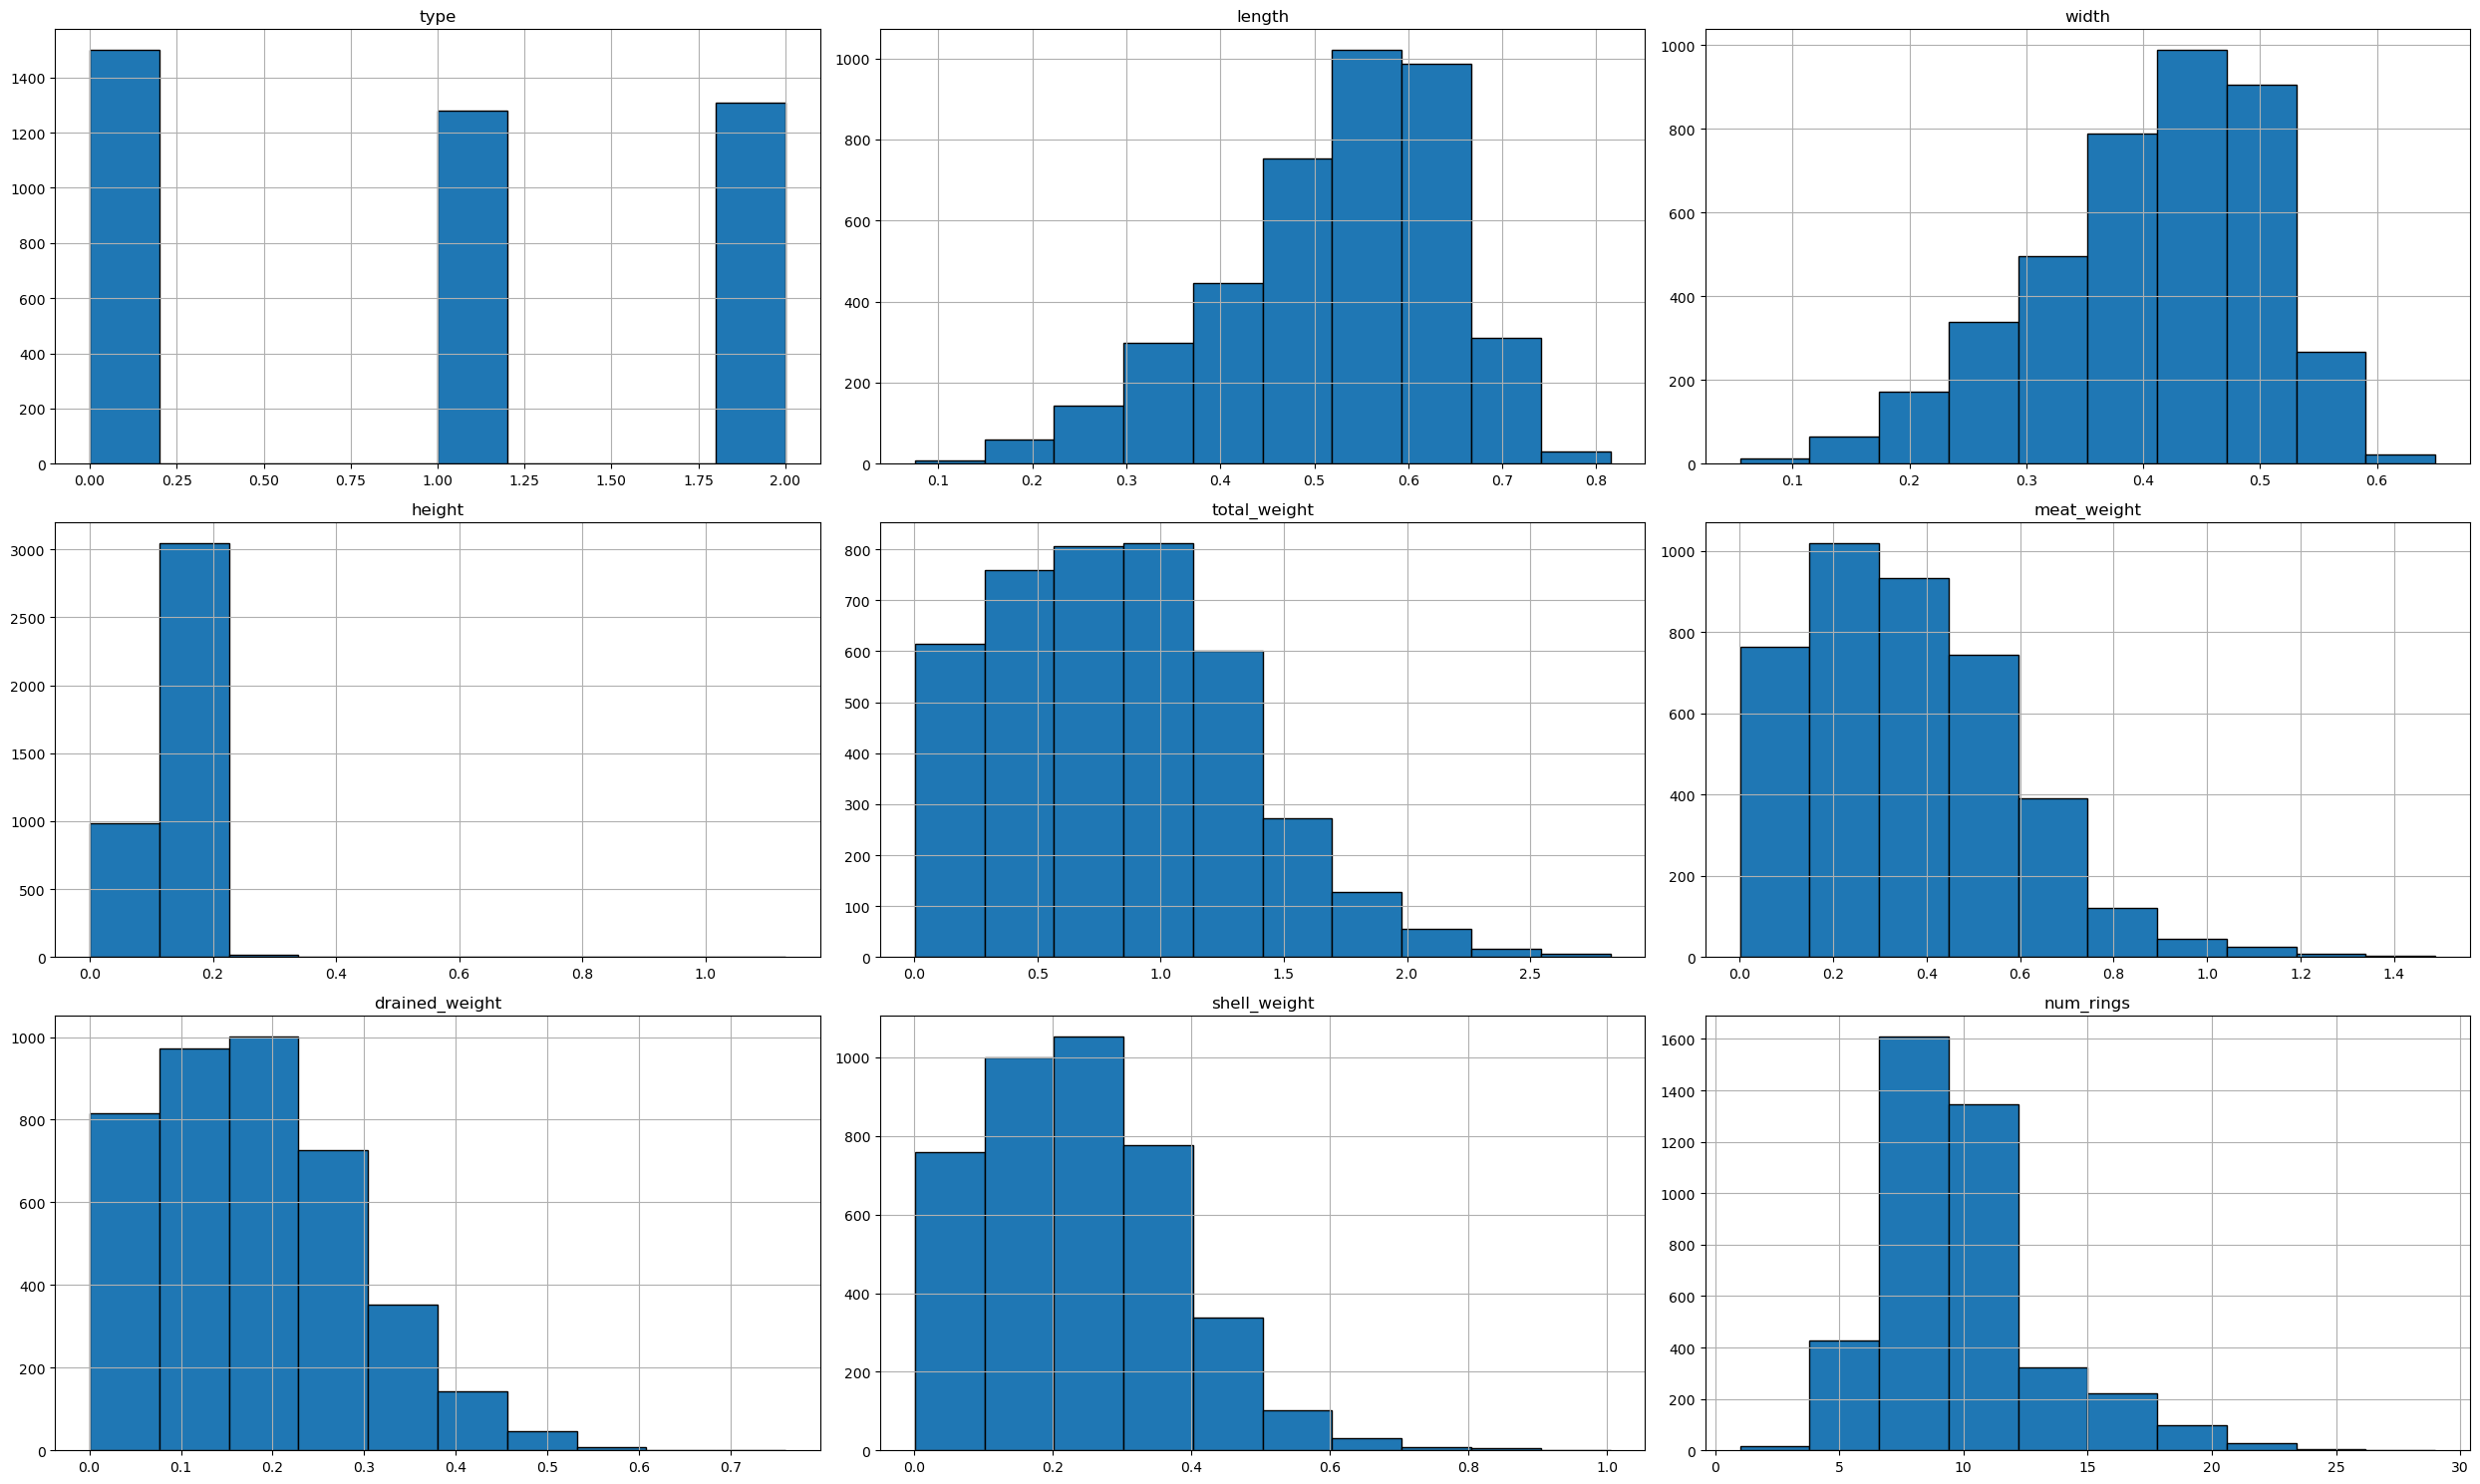

In [9]:
# ESTIMATE THE MISSING VALUES
# 1. Median/Mean

# look at the distributions of the attributes
from matplotlib import pyplot as plt
from matplotlib.pyplot import rcParams
hist = df.hist(figsize = (25,15), edgecolor='k')
plt.tight_layout()

# also look above to compare mean/median
# -> use mean as estimator for all except type & num_rings
df_est = df.copy()
df_est.iloc[:,1:8] = df.iloc[:,1:8].fillna(df_est.mean())
# for num_rings use the median: 
df_est.iloc[:,8] = df_est.iloc[:,8].fillna(df_est["num_rings"].median())
df_est.head(10)
# **still have to find out what to do with categorical variables (here: type)** -> see below "guide"

print("inserting general/total mean/median might increse noise in the data \ninstead, here we could insert mean/median specifically, divided by type")

In [12]:
# 2. KNN imputer = k Nearest Neighbours (aus tut04 34:36)
# look at k rows which are closest (in terms of all other attribute values) to row with missing value 
# and use their mean as an estimate
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
df_knn = df.copy()
imp = SimpleImputer(strategy="most_frequent")
df_knn["type"] = imp.fit_transform(df_knn[["type"]])

imputer = KNNImputer(n_neighbors=10, weights="uniform")
df_knn[:] = imputer.fit_transform(df)
df_knn

,type,length,width,height,total_weight,meat_weight,drained_weight,shell_weight,num_rings
0,0.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,-1.0
1,1.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
2,0.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
3,2.0,-1.000,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
4,2.0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8.0
...,...,...,...,...,...,...,...,...,...
4171,1.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4172,0.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4173,0.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4174,1.0,0.625,0.485,0.150,-1.0000,0.5310,0.2610,0.2960,10.0


### Exercise 1.4

Perform Z-score normalization on every column (except the type of course!)

In [14]:
sd = df_num.std()
print(sd)

df_num_z = df_num.copy()

for column in df_num_z.columns:
    df_num_z[column] = (df_num_z[column] - df_num_z[column].mean()) / df_num_z[column].std()
df_num_z.head(25)

length            0.120286
width             0.099307
height            0.041724
total_weight      0.489673
meat_weight       0.222599
drained_weight    0.109328
shell_weight      0.139131
num_rings         3.227475
dtype: float64


,length,width,height,total_weight,meat_weight,drained_weight,shell_weight,num_rings
0,-1.443993,-1.439534,-1.189003,-1.232135,-1.166955,-1.205076,-1.211842,NaN
1,0.052442,0.121288,-0.110489,-0.310090,-0.461650,-0.354425,-0.205594,-0.285597
2,-0.695776,-0.432552,-0.350159,-0.638881,-0.645838,-0.605962,-0.600906,0.024243
3,NaN,-1.540232,-1.428673,-1.273999,-1.211879,-1.287397,-1.319655,-0.905276
4,-0.820479,-1.087090,-1.069168,-0.974820,-0.980521,-0.939820,-0.852468,-0.595436
5,0.052442,0.070939,0.249015,-0.104851,-0.549251,-0.354425,0.656904,3.122640
6,0.177145,0.171637,-0.350159,-0.124252,-0.293185,-0.281251,0.153780,1.883281
7,-0.404802,-0.382203,-0.350159,-0.652156,-0.641345,-0.619682,-0.529031,-0.285597
8,0.218712,0.322684,0.249015,0.134084,-0.201091,-0.267531,0.585030,2.812801
9,NaN,-0.281505,0.009345,-0.454064,-0.742424,-0.299544,NaN,1.263602


## 2. Preprocessing text (Optional)

One possible way to transform text documents into vectors of numeric attributes is to use the TF-IDF representation. We will experiment with this representation using the 20 Newsgroup data set. The data set contains postings on 20 different topics. The classification problem is to decide which of the topics a posting falls into. Here, we will only consider postings about medicine and space.

In [15]:
from sklearn.datasets import fetch_20newsgroups


categories = ['sci.med', 'sci.space']
raw_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
print(f'The index of each category is: {[(i,target) for i,target in enumerate(raw_data.target_names)]}')

The index of each category is: [(0, 'sci.med'), (1, 'sci.space')]


Check out some of the postings, might find some funny ones!

In [16]:
import numpy as np
idx = np.random.randint(0, len(raw_data.data))
print (f'This is a {raw_data.target_names[raw_data.target[idx]]} email.\n')
print (f'There are {len(raw_data.data)} emails.\n')
print(raw_data.data[idx])

This is a sci.med email.

There are 1187 emails.

From: thom@morgan.ucs.mun.ca (Thomas Clancy)
Subject: Re: Thrush ((was: Good Grief! (was Re: Candida Albicans: what is it?)))
Organization: Memorial University of Newfoundland
Lines: 55

dyer@spdcc.com (Steve Dyer) writes:

>In article <21APR199308571323@ucsvax.sdsu.edu> mccurdy@ucsvax.sdsu.edu (McCurdy M.) writes:
>>Dyer is beyond rude. 

I'll drink to that.

>Yeah, yeah, yeah.  I didn't threaten to rip your lips off, did I?
>Snort.

>>There have been and always will be people who are blinded by their own 
>>knowledge and unopen to anything that isn't already established. Given what 
>>the medical community doesn't know, I'm surprised that he has this outlook.

>Duh.

Nice to see Steve still has his high and almighty intellectual prowess 
in tact.

>>For the record, I have had several outbreaks of thrush during the several 
>>past few years, with no indication of immunosuppression or nutritional 
>>deficiencies. I had not taken any ant

Lets pick the first 10 postings from each category

In [17]:
idxs_med = np.flatnonzero(raw_data.target == 0)
idxs_space = np.flatnonzero(raw_data.target == 1)
idxs = np.concatenate([idxs_med[:10],idxs_space[:10]])
data = np.array(raw_data.data)
data = data[idxs]

<a href="http://www.nltk.org/">NLTK</a> is a toolkit for natural language processing. Take some time to install it and go through this <a href="http://www.slideshare.net/japerk/nltk-in-20-minutes">short tutorial/presentation</a>.

The downloaded package below is a tokenizer that divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.

In [18]:
import nltk
import itertools
nltk.download('punkt')

# Tokenize the sentences into words
tokenized_sentences = [nltk.word_tokenize(sent) for sent in data]
vocabulary_size = 1000
unknown_token = 'unknown'

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nikitaabalakin/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
# Count the word frequencies
word_freq = nltk.FreqDist(itertools.chain(*tokenized_sentences))
print (f"Found {len(word_freq.items())} unique words tokens.")

Found 1636 unique words tokens.


In [20]:
# Get the most common words and build index_to_word and word_to_index vectors
vocab = word_freq.most_common(vocabulary_size-1)
index_to_word = [x[0] for x in vocab]
index_to_word.append(unknown_token)
word_to_index = dict([(w,i) for i,w in enumerate(index_to_word)])
 
print (f"Using vocabulary size {vocabulary_size}." )
print (f"The least frequent word in our vocabulary is '{vocab[-1][0]}' and appeared {vocab[-1][1]} times.")

Using vocabulary size 1000.
The least frequent word in our vocabulary is 'AN' and appeared 1 times.


### Exercise 2.1

Code your own TF-IDF representation function and use it on this dataset. (Don't use code from libraries. Build your own function with Numpy/Pandas). Use the formular TFIDF = TF * (IDF+1). The effect of adding “1” to the idf in the equation above is that terms with zero idf, i.e., terms that occur in all documents in a training set, will not be entirely ignored. The term frequency is the raw count of a term in a document. The inverse document frequency is the natural logarithm of the inverse fraction of the documents that contain the word.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer()
df = pd.DataFrame(countvec.fit_transform(data).toarray(), columns=countvec.get_feature_names_out())

def tfidf(df):
    n_documents = len(df)
    document_counts = (df>0.0001).sum() # for every word: how many documents contain the word?
    idf = np.log(n_documents/document_counts) # log of the inverse frequency
    return df*(idf+1)
    
    
rep = tfidf(df)

# Check if your implementation is correct
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm=None, smooth_idf=False, use_idf=True)
X_train = pd.DataFrame(vectorizer.fit_transform(data).toarray(), columns=countvec.get_feature_names())
answer=['No','Yes']
epsilon = 0.0001
if rep is not None:
    print (f'Is this implementation correct?\nAnswer: {answer[1*np.all((X_train - rep) < epsilon)]}')

Is this implementation correct?
Answer: Yes
